# numpy structured arrays

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Create a type description for a structure with two floating point fields (single precision) and a string of at most 20 characters.

In [2]:
dtype = [
    ('x', np.float32),
    ('y', np.float32),
    ('name', (np.str_, 20)),
]

Create an empty array of three elements with this type.

In [4]:
data = np.empty((3,), dtype=dtype)

Fill the array elementwise using tuples.

In [33]:
data[0] = (1.2, 4.5, 'Alpha')
data[1] = (2.3, 3.4, 'Gamma')
data[2] = (3.4, 2.3, 'Beta')

The numpy array can be viewed as a table, so that columns can be selected by name.

In [7]:
data['x']

array([1.2, 2.3, 3.4], dtype=float32)

Rows are selected by  index, as usual for a numpy array.

In [8]:
data[1]

(2.3, 3.4, 'Gamma')

The type of a row is the somewhat generic `np.void`, the parent class of all scalar numpy data.

In [11]:
type(data[1])

numpy.void

Getting a specific cell in a row and column can be done by 2D-indexing.

In [10]:
data['y'][1]

3.4

First indexing the array, and only then the column is also possible.

In [12]:
data[1]['y']

3.4

This approach makes it very convenient to plot data by specifying column names.

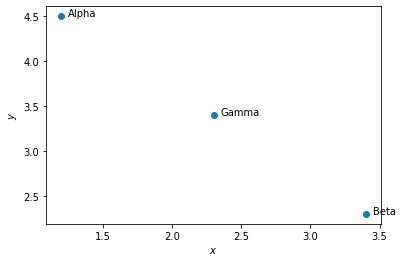

In [39]:
_ = plt.plot(data['x'], data['y'], 'o')
_ = plt.xlabel('$x$')
_ = plt.ylabel('$y$')
for x, y, name in data:
    _ = plt.annotate(name, (x + 0.05, y))

As you would expect, selecting columns or rows produces views.

In [16]:
r = data[1]

In [17]:
r['x'] = -2.5

In [18]:
data

array([( 1.2, 4.5, 'Alpha'), (-2.5, 3.4, 'Gamma'), ( 3.4, 2.3, 'Beta')],
      dtype=[('x', '<f4'), ('y', '<f4'), ('name', '<U20')])

In [19]:
c = data['name']

In [20]:
c[2] = 'Delta'

In [21]:
data

array([( 1.2, 4.5, 'Alpha'), (-2.5, 3.4, 'Gamma'), ( 3.4, 2.3, 'Delta')],
      dtype=[('x', '<f4'), ('y', '<f4'), ('name', '<U20')])

It is also possible to select multiple columns using a list of column names.

In [25]:
data[['x', 'name']]

array([( 1.2, 'Alpha'), (-2.5, 'Gamma'), ( 3.4, 'Delta')],
      dtype={'names':['x','name'], 'formats':['<f4','<U20'], 'offsets':[0,8], 'itemsize':88})

Assigning a string that is longer than the one defined in the data structure does not result in an error, but the string in the array will be truncated to the maximum size.

In [27]:
data[0]['name'] = 'A'*50

In [31]:
len(data[0]['name'])

20